In [1]:
import pandas as pd

# Load the JSON file
df = pd.read_json("../data/News_Category_Dataset_v3.json", lines=True)  # 'lines=True' is needed for JSON lines format

# Display the first few rows
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [3]:
df = df.dropna(subset=['headline'])  # Drop rows where 'headline' is NaN


In [4]:
df = df.drop_duplicates(subset=['headline'])


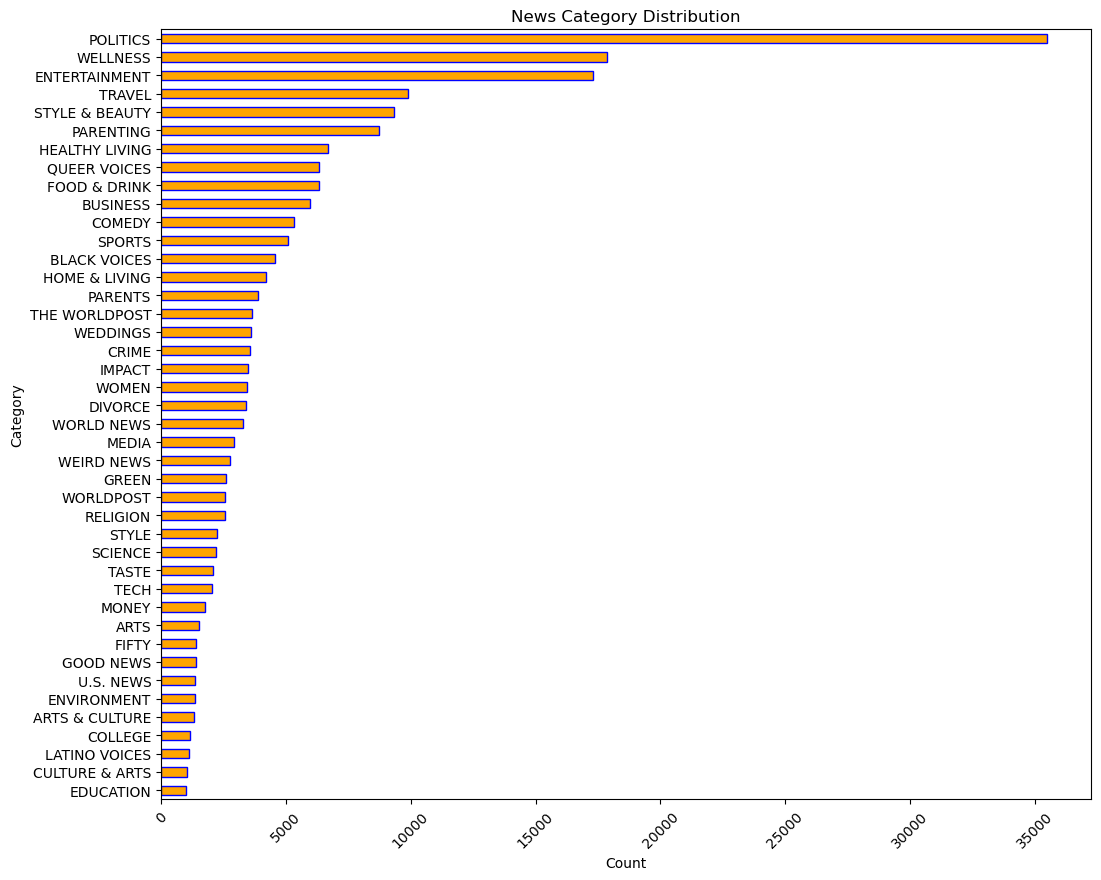

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
df['category'].value_counts().sort_values(ascending=True).plot(kind='barh', color='orange', edgecolor='blue')

plt.title('News Category Distribution')
plt.ylabel('Category')
plt.xlabel('Count')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()


#df['category'].value_counts().plot(kind='bar')

In [6]:
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))
df['headline_length'].describe()

count    207996.000000
mean          9.611560
std           3.064676
min           0.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          44.000000
Name: headline_length, dtype: float64

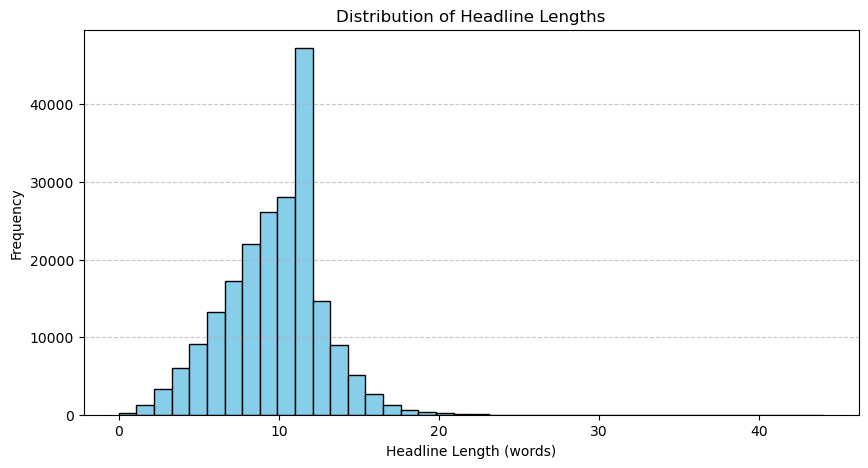

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df['headline_length'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel("Headline Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Headline Lengths")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [8]:
df['headline'] = df['headline'].str.strip()

## Pre-processing for LSTM

LSTM models use fixed-length sequences, so we must tokenize, pad, and encode words as embeddings.

In [9]:
df_lstm['headline'] = df['headline'].copy().str.lower()

In [10]:
import re
df_lstm['headline'] = df_lstm['headline'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [11]:
from collections import Counter
word_counts = Counter(" ".join(df_lstm['headline']).split())
print(f"Vocabulary size: {len(word_counts)}")

Vocabulary size: 68976


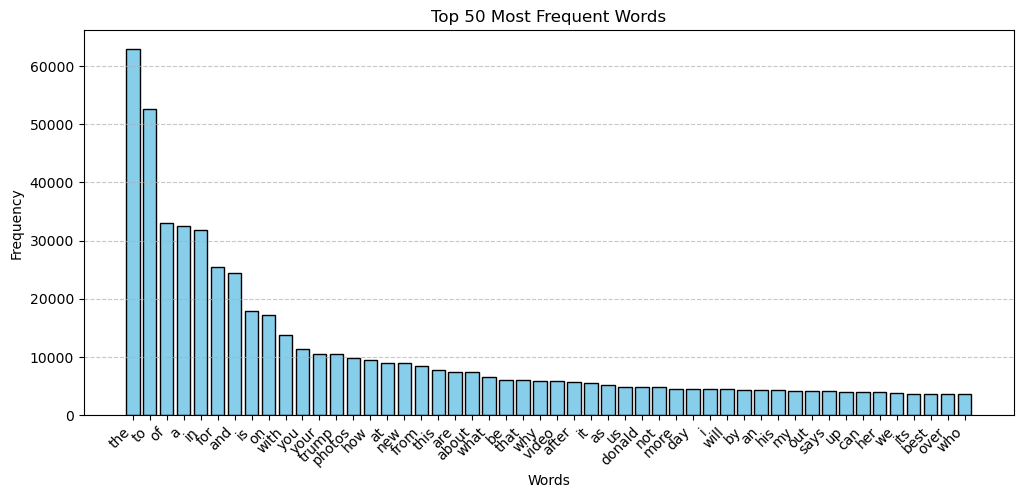

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert word frequencies to DataFrame and sort
word_freqs = pd.Series(word_counts).sort_values(ascending=False).head(50)

# Create Matplotlib bar chart
plt.figure(figsize=(12, 5))
plt.bar(word_freqs.index, word_freqs.values, color='skyblue', edgecolor='black')

# Labels and title
plt.title("Top 50 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for clarity

plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adma224/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


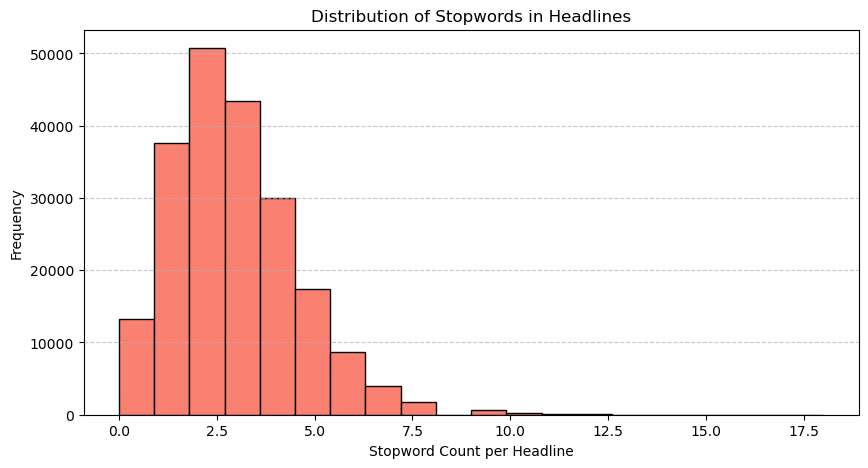

In [13]:
import matplotlib.pyplot as plt
import nltk

# Download stopwords (only needed once)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words('english'))

# Compute stopword count per headline
df_lstm['stopword_count'] = df_lstm['headline'].apply(lambda x: sum(1 for word in x.split() if word in stop_words))

# Create Matplotlib histogram
plt.figure(figsize=(10, 5))
plt.hist(df_lstm['stopword_count'], bins=20, color='salmon', edgecolor='black')

# Labels and title
plt.xlabel("Stopword Count per Headline")
plt.ylabel("Frequency")
plt.title("Distribution of Stopwords in Headlines")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for readability

plt.show()




Text(0.5, 1.0, 'Word Frequency Distribution (Log-Log Scale)')

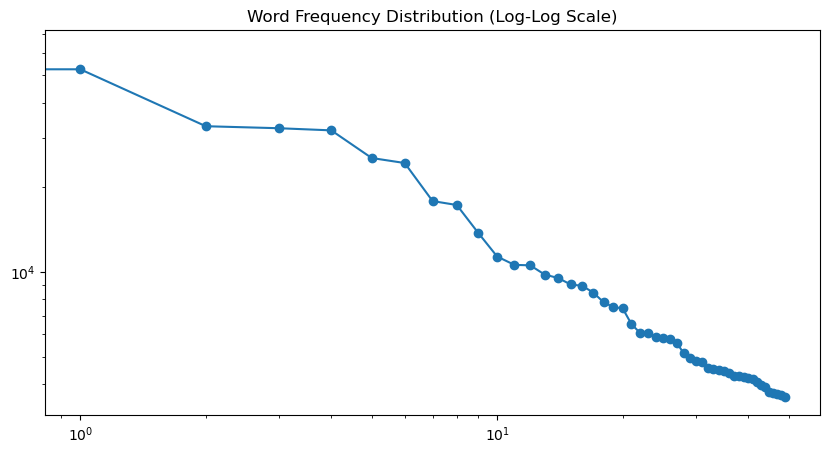

In [14]:
word_freqs.reset_index(drop=True).plot(logx=True, logy=True, marker='o', linestyle='-', figsize=(10,5))
plt.title("Word Frequency Distribution (Log-Log Scale)")


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_lstm['headline'])
df_lstm['tokenized'] = tokenizer.texts_to_sequences(df_lstm['headline'])


2025-03-12 14:11:35.657218: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 14:11:35.672656: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 14:11:35.767996: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-12 14:11:36.972029: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
df_lstm[['headline','tokenized']]

,headline,tokenized
0,over 4 million americans roll up sleeves for o...,"[49, 187, 212, 222, 1993, 43, 19431, 6, 37764,..."
1,american airlines flyer charged banned for lif...,"[142, 1109, 9248, 999, 2116, 6, 65, 27, 8160, ..."
2,23 of the funniest tweets about cats and dogs ...,"[2065, 3, 1, 1830, 433, 21, 1731, 7, 682, 19, ..."
3,the funniest tweets from parents this week sep...,"[1, 1830, 433, 18, 162, 19, 93, 7152, 12823]"
4,woman who called cops on black birdwatcher los...,"[129, 50, 879, 494, 9, 85, 29252, 1509, 851, 1..."
...,...,...
209522,rim ceo thorsten heins significant plans for b...,"[12138, 730, 69095, 69096, 5261, 756, 6, 13429]"
209523,maria sharapova stunned by victoria azarenka i...,"[3751, 13285, 7343, 37, 3191, 27639, 5, 2076, ..."
209524,giants over patriots jets over colts among mo...,"[3572, 49, 4168, 4728, 49, 8278, 988, 71, 1862..."
209525,aldon smith arrested 49ers linebacker busted f...,"[23967, 1006, 532, 7362, 12535, 4925, 6, 6419]"


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max(df_lstm['tokenized'].apply(len))
df_lstm['padded'] = list(pad_sequences(df_lstm['tokenized'], maxlen=max_length, padding='post'))

In [ ]:
df_lstm[['headline', 'lstm_padded']].to_csv("lstm_dataset.csv", index=False)

## Preprocessing for GPT-2

GPT-2 uses subword tokenization (Byte-Pair Encoding, BPE) instead of word-based tokenization.
It requires special tokens (`<bos>` and `<eos>`).

In [18]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Add special tokens
df_gpt2['tokenized'] = df['headline'].copy().apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


In [19]:
max_length = max(len(tokens) for tokens in df_gpt2['tokenized'])
df_gpt2['padded'] = df_gpt2['tokenized'].apply(lambda x: x[:max_length] if len(x) > max_length else x + [tokenizer.pad_token_id] * (max_length - len(x)))


In [ ]:
df[['headline', 'gpt2_tokens']].to_json("gpt2_dataset.json", orient="records", lines=True)